# Tree Based and Boosting MLAlgorithms

## Objective : To predict the survival status  of passengers based on other features.

## Task 1
Import the required libraries:

Import Pandas and alias it as pd.

Import NumPy and alias it as np.

Import Scikit-learn and alias it as sklearn.

In [71]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

Load the Titanic dataset:
Load the 'titanic.csv' file using the Pandas library
and assign it to a variable named 'data'.

In [72]:
df = pd.read_excel('/kaggle/input/train-xlsx-62-56-kb/train.xlsx')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Task 2

Load the Titanic dataset:

Load the 'titanic.csv' file using the Pandas library and assign it to a variable named 'data'.

In [75]:
data = pd.read_excel('/kaggle/input/train-xlsx-62-56-kb/train.xlsx')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 3

Data preprocessing:
    
Handle missing values by imputing the mean agefor the 'Age' column and the most frequent valuefor the 'Embarked' column.

Check out for the Outliers and If present, treat them by using the concept of Winsorization.

Drop the 'Cabin' column from the dataset.Convert categorical variables (e.g., 'Sex','Embarked') into numerical variables usingappropriate techniques (e.g., one-hot encoding,label encoding).

Split the dataset into features (X) and target (y) variables.

In [76]:
# Handle missing values by imputing the mean age for the 'Age' column and the most frequent value for the 'Embarked' column.
df['Age'] = df['Age'].fillna(df['Age'].mean()) 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [77]:
# Check out for the Outliers and If present, treat them by using the concept of Winsorization.

for col in df[['Age','Fare']].columns:
    first_quartile = df[col].quantile(0.25)
    third_quartile = df[col].quantile(0.75)
    iqr = third_quartile - first_quartile
    lower_bound = first_quartile - 1.5 * iqr
    upper_bound = third_quartile + 1.5 * iqr
    # Applying Winsorization
    df[col] = df[col].apply(lambda value: lower_bound if value < lower_bound else upper_bound if value > upper_bound else value)

In [78]:
#Drop the 'Cabin' column from the dataset.
df = df.drop(columns=['Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
from sklearn.preprocessing import OneHotEncoder
# Convert categorical variables (e.g., 'Sex','Embarked') into numerical variables using appropriate techniques (e.g., one-hot encoding,label encoding).
saved_encoders = {}
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(df[['Sex','Embarked']])
saved_encoders[col] = encoder
encoded_df = pd.DataFrame(encoder.transform(df[['Sex','Embarked']]), columns = encoder.get_feature_names_out(['Sex', 'Embarked']))
df = pd.concat([df,encoded_df],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0,1.0


In [80]:
#Split the dataset into features (X) and target (y) variables.

X = df[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']]
y = df['Survived']

## Tasks 4:

Classification models:
Build a logistic regression model to predict the survival status ('Survived') of passengers based on other features.

Build a decision tree model to classify the passengers as survivors or non-survivors using the Gini Index or Information Gain as the splitting criterion.

Build a random forest model by aggregating multiple decision trees and compare its performance with the single decision tree model.

Build an ensemble model using bagging (e.g., BaggingClassifier) and compare its performance with the single decision tree model.

Build an ensemble model using boosting algorithms such as Adaptive Boosting (AdaBoost)and Gradient Boosting and compare their performance with the single decision tree model.

Compare the performance of all the classification models using appropriate evaluation metrics (e.g.,accuracy, precision, recall, F1-score).


Model evaluation:

Split the dataset into training and testing sets using appropriate techniques (e.g., train test split,cross-validation).

Train and evaluate the regression and classification models on the testing set using appropriate evaluation metrics.

Tasks:
Perform hyperparameter tuning (if applicable) to improve the performance of the models.

Final model selection:
Select the best performing regression and classification models based on the evaluation metrics.

Discuss the strengths and weaknesses of the selected models

## Logistic regression model

### feature selection

In [81]:
# Fit logistic regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X, y)

# Print the coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": np.abs(logreg.coef_[0])})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

      Feature  Coefficient
5    Sex_male     2.625422
0      Pclass     0.870599
2       SibSp     0.407019
7  Embarked_S     0.336911
3       Parch     0.140933
1         Age     0.042779
6  Embarked_Q     0.030377
4        Fare     0.016235


In [82]:
# Logistic Regression model
logreg = LogisticRegression(max_iter=200)

# Initialize RFE with the logistic regression model
rfe = RFE(logreg, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Rank the features
feature_ranking = pd.DataFrame({"Feature": X.columns, "Ranking": rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by="Ranking")
print(feature_ranking)

      Feature  Ranking
5    Sex_male        1
0      Pclass        2
7  Embarked_S        3
2       SibSp        4
3       Parch        5
1         Age        6
6  Embarked_Q        7
4        Fare        8


In [83]:
### removing removing Fare, Embarked_Q, and possibly Age, as they show the least importance in both the coefficient and RFE rankings. 

X_logistic = df[['Pclass', 'Sex_male', 'SibSp', 'Parch', 'Embarked_S']]
y_logistic = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.20, random_state=42, stratify=y_logistic)

In [84]:
#Oversampling

#Before Oversampling
print('Before Oversampling:', y_train.value_counts())

# Applying oversampling SMOTE
over_sampler = SMOTE(sampling_strategy=0.75,random_state=42,k_neighbors=3,n_jobs=None)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

print('\n')

#After Oversampling
print('After Oversampling:', y_train.value_counts())

Before Oversampling: Survived
0    439
1    273
Name: count, dtype: int64


After Oversampling: Survived
0    439
1    329
Name: count, dtype: int64


In [85]:
# #Undersampling

# #Before Undersampling
# print('Before Undersampling:', y_train.value_counts())

# # Applying undersampling EditedNearestNeighbours
# enn = EditedNearestNeighbours(n_neighbors=3, kind_sel='all', n_jobs=-1)
# X_train, y_train = enn.fit_resample(X_train, y_train)

# print('\n')

# #After Undersampling
# print('After Undersampling:', y_train.value_counts())

In [86]:
# Define the model
logreg = LogisticRegression()

# Define the adjusted parameter grid to avoid warnings
param_grid_adjusted = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear'],  # 'liblinear' supports 'l1' and 'l2' only
        'max_iter': [100, 200, 300],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l2'],
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs'],  # 'lbfgs' only supports 'l2'
        'max_iter': [100, 200, 300],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],  # Only elasticnet uses l1_ratio
        'C': [0.1, 1, 10, 100],
        'solver': ['saga'],  # 'saga' supports 'l1', 'l2', and 'elasticnet'
        'max_iter': [100, 200, 300, 1000],
        'class_weight': [None, 'balanced'],
        'l1_ratio': [0, 0.5, 1]  # Only relevant for 'elasticnet'
    }
]

# Perform grid search with the refined parameter grid
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_adjusted,
    cv=5,  # 5-fold cross-validation
    scoring='recall',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model_logistic = grid_search.best_estimator_

# Predict on the training set
y_train_pred = best_model_logistic.predict(X_train)

# Predict on the test set
y_test_pred = best_model_logistic.predict(X_test)

# Generate the classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       439
           1       0.69      0.79      0.74       329

    accuracy                           0.76       768
   macro avg       0.76      0.76      0.76       768
weighted avg       0.77      0.76      0.76       768

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       110
           1       0.68      0.78      0.72        69

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



## Decision Tree Model

### Feature Importance

In [87]:
# Train the model
decision_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

decision_tree.fit(X, y)

# Feature importances
feature_importances = decision_tree.feature_importances_

# DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

      Feature  Importance
5    Sex_male    0.310364
1         Age    0.239450
4        Fare    0.231425
0      Pclass    0.118360
2       SibSp    0.047997
3       Parch    0.034013
7  Embarked_S    0.014695
6  Embarked_Q    0.003696


In [88]:
# RFE with Decision Tree
rfe = RFE(estimator=decision_tree, n_features_to_select=4)
rfe.fit(X, y)

# Feature ranking
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(rfe_ranking)

      Feature  Ranking
0      Pclass        1
1         Age        1
4        Fare        1
5    Sex_male        1
2       SibSp        2
3       Parch        3
7  Embarked_S        4
6  Embarked_Q        5


In [89]:
# Using use Sex_male, Age, Fare, and Pclass as for the model based on both feature importance and RFE ranking.

X_decision = df[['Sex_male', 'Age', 'Fare', 'Pclass']]
y_decision = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_decision, y_decision, test_size=0.20, random_state=42, stratify=y_decision)

In [90]:
#Oversampling

#Before Oversampling
print('Before Oversampling:', y_train.value_counts())

# Applying oversampling SMOTE
over_sampler = SMOTE(sampling_strategy=0.75,random_state=42,k_neighbors=3,n_jobs=None)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

print('\n')

#After Oversampling
print('After Oversampling:', y_train.value_counts())

Before Oversampling: Survived
0    439
1    273
Name: count, dtype: int64


After Oversampling: Survived
0    439
1    329
Name: count, dtype: int64


In [91]:
# #Undersampling

# #Before Undersampling
# print('Before Undersampling:', y_train.value_counts())

# # Applying undersampling EditedNearestNeighbours
# enn = EditedNearestNeighbours(n_neighbors=3, kind_sel='all', n_jobs=-1)
# X_train, y_train = enn.fit_resample(X_train, y_train)

# print('\n')

# #After Undersampling
# print('After Undersampling:', y_train.value_counts())

In [92]:
# Model Training

model = DecisionTreeClassifier(random_state = 42)

# Parameter Grid
param_grid = [{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],  
    'max_depth': [5, 7, 10, 20],  
    'min_samples_split': [10, 15],  
    'min_samples_leaf': [4, 6],  
    'max_leaf_nodes': [10, 20],  
    'min_impurity_decrease': [0.01, 0.05],  
    'class_weight': ['balanced'],  
    'ccp_alpha': [0.01, 0.1]  
}]

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = 'recall',
    n_jobs=-1,
    cv = 10,
    verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

best_model_decision = grid_search.best_estimator_

# Predict on training set
y_train_pred = best_model_decision.predict(X_train)

# Predict ontest set
y_test_pred = best_model_decision.predict(X_test)

# classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Save model using pickle
with open('model_decision.pkl', 'wb') as f:
    pickle.dump(best_model_decision, f)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Best Parameters: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       439
           1       0.83      0.74      0.79       329

    accuracy                           0.83       768
   macro avg       0.83      0.82      0.82       768
weighted avg       0.83      0.83      0.83       768

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79    

In [93]:
# Adjusting the decision threshold to improve the model performance

# Predicted probabilities for class 1
y_train_proba = best_model_decision.predict_proba(X_train)[:, 1]
y_test_proba = best_model_decision.predict_proba(X_test)[:, 1]

# Custom threshold (using 0.3 instead of 0.5)
threshold = 0.3

# Apply the threshold to make predictions
y_train_pred_threshold = (y_train_proba >= threshold).astype(int)
y_test_pred_threshold = (y_test_proba >= threshold).astype(int)

# New Predictions
print("Training Classification Report with threshold adjustment:")
print(classification_report(y_train, y_train_pred_threshold))

print("Testing Classification Report with threshold adjustment:")
print(classification_report(y_test, y_test_pred_threshold))

Training Classification Report with threshold adjustment:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       439
           1       0.73      0.87      0.79       329

    accuracy                           0.80       768
   macro avg       0.81      0.81      0.80       768
weighted avg       0.82      0.80      0.81       768

Testing Classification Report with threshold adjustment:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       110
           1       0.61      0.80      0.69        69

    accuracy                           0.73       179
   macro avg       0.73      0.74      0.72       179
weighted avg       0.75      0.73      0.73       179



## Random Forest model 

#### Feature Importance

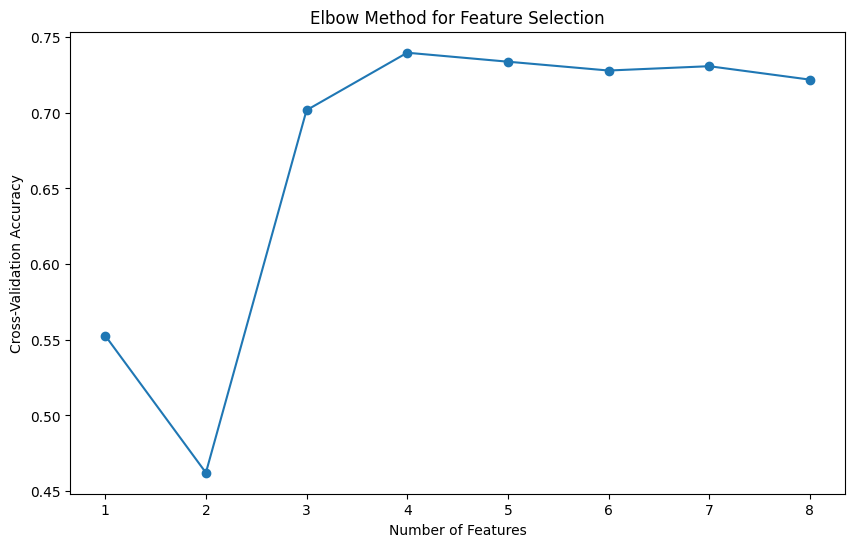

In [94]:
# Initialize the classifier
random_forest = RandomForestClassifier(random_state=42)

# Mean cross-validation scores
scores = []

# Loop through various numbers of selected features
for i in range(1, X.shape[1] + 1):
    rfe = RFE(estimator=random_forest, n_features_to_select=i)
    rfe.fit(X, y)
    scoring='recall'
    # Perform cross-validation
    score = np.mean(cross_val_score(rfe, X, y, cv=5, scoring=scoring))
    scores.append(score)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), scores, marker='o')
plt.title("Elbow Method for Feature Selection")
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation Accuracy")
plt.show()

In [95]:
#Using RECURSIVE FEATURE ELEMINATION WITH CROSS-VALIDATION(RFECV)
rfecv = RFECV(estimator=random_forest, step=1, cv=5, scoring='f1')
rfecv.fit(X,y)

# Number of features chosen
print("Optimal number of features:", rfecv.n_features_)

pd.DataFrame({'Feature': X.columns, 'Ranking': rfecv.ranking_}).sort_values(by='Ranking')

Optimal number of features: 5


,Feature,Ranking
0,Pclass,1
1,Age,1
2,SibSp,1
4,Fare,1
5,Sex_male,1
3,Parch,2
7,Embarked_S,3
6,Embarked_Q,4


In [96]:
# Using use Sex_male, Age, Fare, and Pclass as for the model based on both feature importance and RFE ranking.

X_random = df[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_male']]
y_random  = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_random , y_random , test_size=0.20, random_state=42, stratify=y_random)

In [97]:
#Oversampling

#Before Oversampling
print('Before Oversampling:', y_train.value_counts())

# Applying oversampling SMOTE
over_sampler = SMOTE(sampling_strategy=0.75,random_state=42,k_neighbors=3,n_jobs=None)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

print('\n')

#After Oversampling
print('After Oversampling:', y_train.value_counts())

Before Oversampling: Survived
0    439
1    273
Name: count, dtype: int64


After Oversampling: Survived
0    439
1    329
Name: count, dtype: int64


In [98]:
model = RandomForestClassifier(random_state=42)

param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ["sqrt", "log2", None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

random_seach = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_distributions, 
    n_iter=10,  
    scoring='recall',
    n_jobs=-1,  
    cv=5,       
    verbose=1,  
    random_state=42)

random_seach.fit(X_random,y_random)

print("Best Parameters:", random_seach.best_params_)

best_model_random = random_seach.best_estimator_


# Predict on the training set
y_train_pred = best_model_random.predict(X_train)

# Predict on the test set
y_test_pred = best_model_random.predict(X_test)

# Generate the classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       439
           1       0.87      0.84      0.85       329

    accuracy                           0.88       768
   macro avg       0.88      0.87      0.87       768
weighted avg       0.88      0.88      0.88       768

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       110
           1       0.79      0.81      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



## BaggingClassifier

#### Feature importance

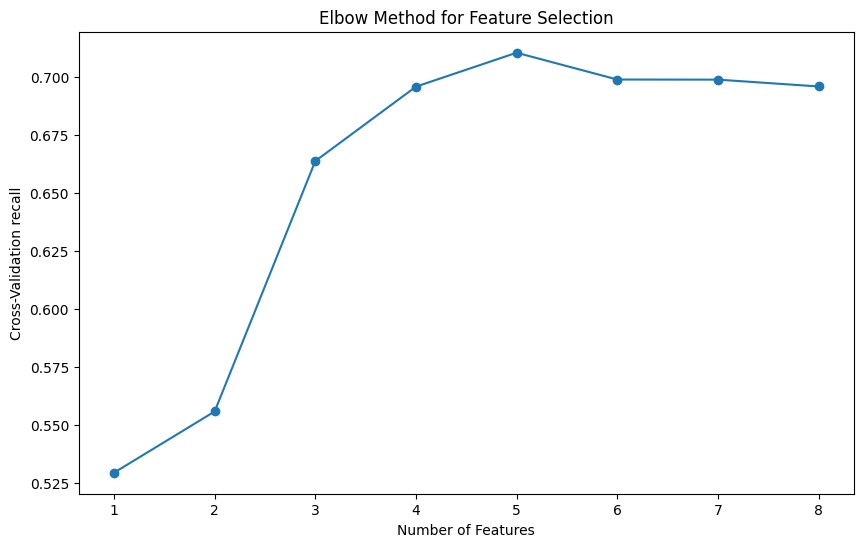

In [99]:
#Calculating optimal number of features i

scores = []

for i in range(1,X.shape[1]+1):
    rfe = RFE(estimator=DecisionTreeClassifier(random_state = 42),n_features_to_select=i)
    rfe.fit(X,y)
    scoring='recall'
    # Perform cross-validation
    score = np.mean(cross_val_score(rfe, X, y, cv=5, scoring=scoring))
    scores.append(score)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), scores, marker='o')
plt.title("Elbow Method for Feature Selection")
plt.xlabel("Number of Features")
plt.ylabel(f"Cross-Validation {scoring}")
plt.show()

In [100]:
#Using RECURSIVE FEATURE ELEMINATION WITH CROSS-VALIDATION(RFECV)
rfecv = RFECV(estimator=DecisionTreeClassifier(random_state = 42), step=1, cv=5, scoring='recall')
rfecv.fit(X,y)

# Number of features chosen
print("Optimal number of features:", rfecv.n_features_)

pd.DataFrame({'Feature': X.columns, 'Ranking': rfecv.ranking_}).sort_values(by='Ranking')

Optimal number of features: 5


,Feature,Ranking
0,Pclass,1
1,Age,1
2,SibSp,1
4,Fare,1
5,Sex_male,1
3,Parch,2
7,Embarked_S,3
6,Embarked_Q,4


In [101]:
# Using use Sex_male, Age, Fare, and Pclass as for the model based on both feature importance and RFE ranking.

X_bagging = df[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_male']]
y_bagging   = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_random , y_random , test_size=0.20, random_state=42, stratify=y_random)

In [102]:
#Oversampling

#Before Oversampling
print('Before Oversampling:', y_train.value_counts())

# Applying oversampling SMOTE
over_sampler = SMOTE(sampling_strategy=0.75,random_state=42,k_neighbors=3,n_jobs=None)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

print('\n')

#After Oversampling
print('After Oversampling:', y_train.value_counts())

Before Oversampling: Survived
0    439
1    273
Name: count, dtype: int64


After Oversampling: Survived
0    439
1    329
Name: count, dtype: int64


In [103]:
# Define the base model 
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Define the hyperparameter grid
param_distributions = {
    'n_estimators': [10, 50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],  # Note the change here as well
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=bagging_classifier, param_distributions=param_distributions, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

best_model_bagging = random_search.best_estimator_

# Predict on the training set
y_train_pred = best_model_bagging.predict(X_train)

# Predict on the test set
y_test_pred = best_model_bagging.predict(X_test)

# Generate the classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'n_estimators': 100, 'max_samples': 0.7, 'max_features': 1.0, 'estimator__max_depth': 10, 'bootstrap_features': False, 'bootstrap': False}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       439
           1       0.99      0.89      0.94       329

    accuracy                           0.95       768
   macro avg       0.96      0.94      0.95       768
weighted avg       0.95      0.95      0.95       768

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



## Adaptive Boosting (AdaBoost)

#### Feature Importance

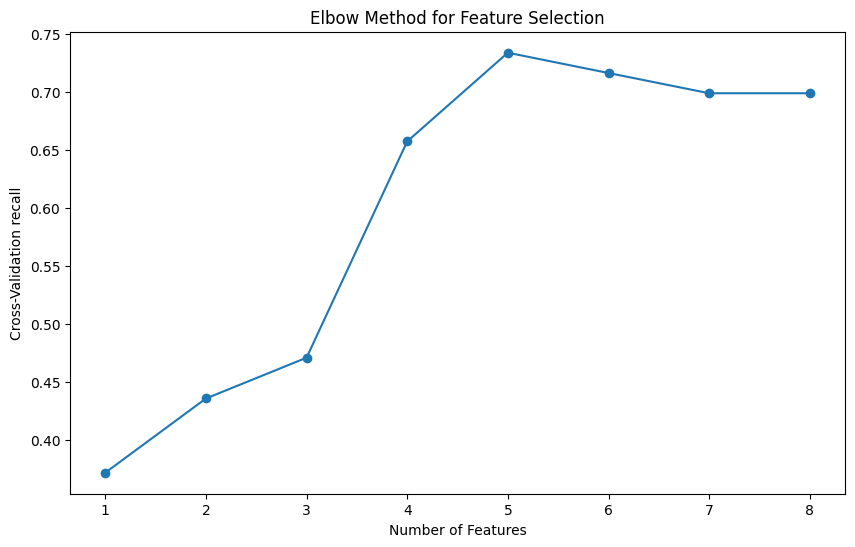

{1: ['Fare'],
 2: ['Age', 'Fare'],
 3: ['Age', 'SibSp', 'Fare'],
 4: ['Pclass', 'Age', 'SibSp', 'Fare'],
 5: ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_male'],
 6: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'],
 7: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_S'],
 8: ['Pclass',
  'Age',
  'SibSp',
  'Parch',
  'Fare',
  'Sex_male',
  'Embarked_Q',
  'Embarked_S']}

In [104]:
scores = []
selected_features_list = {}

for i in range(1,X.shape[1]+1):
    rfe = RFE(estimator=AdaBoostClassifier(random_state=42),n_features_to_select=i, step=1)
    rfe.fit(X,y)
    scoring='recall'
    score = np.mean(cross_val_score(rfe, X, y, scoring=scoring, cv=5))
    scores.append(score)
    
    # Save the names of selected features
    selected_features_list[i] = X.columns[rfe.support_].tolist()  # Extracting the selected features based on boolean mask
    
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), scores, marker='o')
plt.title("Elbow Method for Feature Selection")
plt.xlabel("Number of Features")
plt.ylabel(f"Cross-Validation {scoring}")
plt.show()
selected_features_list

In [105]:
rfecv = RFECV(estimator=AdaBoostClassifier(random_state = 42), step=1, cv=5, scoring='recall')
rfecv.fit(X,y)
# Number of features chosen
print("Optimal number of features:", rfecv.n_features_)

pd.DataFrame({'Feature': X.columns, 'Ranking': rfecv.ranking_}).sort_values(by='Ranking')

Optimal number of features: 5


,Feature,Ranking
0,Pclass,1
1,Age,1
2,SibSp,1
4,Fare,1
5,Sex_male,1
3,Parch,2
7,Embarked_S,3
6,Embarked_Q,4


In [106]:
X_adaboost = X[['Pclass','Age','SibSp','Fare','Sex_male']]
y_adaboost = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_decision, y_decision, test_size=0.20, random_state=42, stratify=y_decision)

In [107]:
#Oversampling

#Before Oversampling
print('Before Oversampling:', y_train.value_counts())

# Applying oversampling SMOTE
over_sampler = SMOTE(sampling_strategy=0.75,random_state=42,k_neighbors=3,n_jobs=None)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

print('\n')

#After Oversampling
print('After Oversampling:', y_train.value_counts())

Before Oversampling: Survived
0    439
1    273
Name: count, dtype: int64


After Oversampling: Survived
0    439
1    329
Name: count, dtype: int64


In [108]:
# Define the base model 
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Hyperparameter grid with 'estimator__max_depth'
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],  
    'learning_rate': [0.01, 0.1, 0.5, 1.0],   
    'estimator__max_depth': [1, 2, 3, 4, 5], 
    'algorithm': ['SAMME', 'SAMME.R']  
}

# Create a StratifiedKFold object
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=adaboost, param_distributions=param_distributions, n_iter=10, cv=10, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_model_adaboost = random_search.best_estimator_

# Predict on the training set
y_train_pred = best_model_adaboost.predict(X_train)

# Predict on the test set
y_test_pred = best_model_adaboost.predict(X_test)

# classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'n_estimators': 500, 'learning_rate': 0.1, 'estimator__max_depth': 4, 'algorithm': 'SAMME'}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       439
           1       0.87      0.84      0.85       329

    accuracy                           0.88       768
   macro avg       0.87      0.87      0.87       768
weighted avg       0.87      0.88      0.87       768

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



##  Gradient Boosting

#### Feature Importance

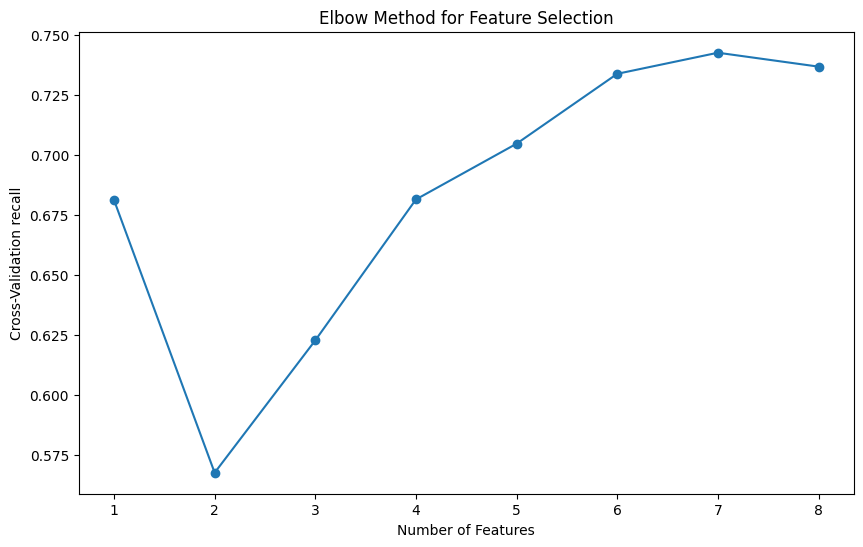

In [109]:
#Calculating optimal number of features i

scores = []

for i in range(1,X.shape[1]+1):
    rfe = RFE(estimator= xgb.XGBClassifier(random_state=42),n_features_to_select=i)
    rfe.fit(X,y)
    scoring='recall'
    # Perform cross-validation
    score = np.mean(cross_val_score(rfe, X, y, cv=5, scoring=scoring))
    scores.append(score)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), scores, marker='o')
plt.title("Elbow Method for Feature Selection")
plt.xlabel("Number of Features")
plt.ylabel(f"Cross-Validation {scoring}")
plt.show()

In [110]:
#Using RECURSIVE FEATURE ELEMINATION WITH CROSS-VALIDATION(RFECV)
rfecv = RFECV(estimator=xgb.XGBClassifier(random_state=42), step=1, cv=5, scoring='recall')
rfecv.fit(X,y)

# Number of features chosen
print("Optimal number of features:", rfecv.n_features_)

pd.DataFrame({'Feature': X.columns, 'Ranking': rfecv.ranking_}).sort_values(by='Ranking')

Optimal number of features: 7


,Feature,Ranking
0,Pclass,1
1,Age,1
2,SibSp,1
3,Parch,1
4,Fare,1
5,Sex_male,1
7,Embarked_S,1
6,Embarked_Q,2


In [111]:
X_gradient = X[['Pclass','Age','SibSp','Fare','Parch','Fare','Sex_male']]
y_gradient = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_decision, y_decision, test_size=0.20, random_state=42, stratify=y_decision)

In [112]:
#Oversampling

#Before Oversampling
print('Before Oversampling:', y_train.value_counts())

# Applying oversampling SMOTE
over_sampler = SMOTE(sampling_strategy=0.75,random_state=42,k_neighbors=3,n_jobs=None)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

print('\n')

#After Oversampling
print('After Oversampling:', y_train.value_counts())

Before Oversampling: Survived
0    439
1    273
Name: count, dtype: int64


After Oversampling: Survived
0    439
1    329
Name: count, dtype: int64


In [113]:
# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],          
    'learning_rate': [0.01, 0.1, 0.2, 0.3],       
    'max_depth': [3, 5, 7],                       
    'min_child_weight': [1, 3, 5],                
    'subsample': [0.6, 0.8, 1.0],               
    'colsample_bytree': [0.6, 0.8, 1.0],        
    'gamma': [0, 0.1, 0.2],                     
    'reg_alpha': [0, 0.01, 0.1, 1.0],           
    'reg_lambda': [0, 0.01, 0.1, 1.0]            
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_model_gradient = random_search.best_estimator_

# Predict on the training set
y_train_pred = best_model_gradient.predict(X_train)

# Predict on the test set
y_test_pred = best_model_gradient.predict(X_test)

# Classification report for training set
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Classification report for testing set
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       439
           1       0.89      0.81      0.85       329

    accuracy                           0.88       768
   macro avg       0.88      0.87      0.87       768
weighted avg       0.88      0.88      0.88       768

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



## SUPPORT VECTOR MACHINE(SVM)

#### Feature Selection

In [114]:
# Using pretuned best models 

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Instantiate the SVC
svc = SVC()

scoring = 'recall'

# Perform Grid Search with Cross-Validation (5-fold)
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring=scoring, n_jobs=-1)
grid_search.fit(X, y)

# Best kernel and parameters
print("Best parameters found: ", grid_search.best_params_)
print(f"Best {scoring} score: ", grid_search.best_score_)

Best parameters found:  {'kernel': 'linear'}
Best recall score:  0.6811594202898551


In [115]:
# # The linear kernel is the best, we can now use it with Recursive Feature Elimination (RFE).

# scores = []
# selected_features_list = {}

# for i in range(1,X.shape[1]+1):
#     rfe = RFE(estimator=SVC(kernel='linear', random_state=42),n_features_to_select=i, step=1)
#     rfe.fit(X,y)
#     scoring='recall'
#     score = np.mean(cross_val_score(rfe, X, y, scoring=scoring, cv=5))
#     scores.append(score)
    
#     # Save the names of selected features
#     selected_features_list[i] = X.columns[rfe.support_].tolist()  # Extracting the selected features based on boolean mask
    
# # Plot the elbow curve
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, X.shape[1] + 1), scores, marker='o')
# plt.title("Elbow Method for Feature Selection")
# plt.xlabel("Number of Features")
# plt.ylabel(f"Cross-Validation {scoring}")
# plt.show()
# selected_features_list

In [116]:
# The linear kernel is the best, we can now use it with Recursive Feature Elimination (RFE).

rfecv = RFECV(estimator=SVC(kernel='linear', random_state=42), step=1, cv=5, scoring='recall')
rfecv.fit(X,y)
# Number of features chosen
print("Optimal number of features:", rfecv.n_features_)

pd.DataFrame({'Feature': X.columns, 'Ranking': rfecv.ranking_}).sort_values(by='Ranking')

Optimal number of features: 1


,Feature,Ranking
5,Sex_male,1
0,Pclass,2
2,SibSp,3
7,Embarked_S,4
3,Parch,5
4,Fare,6
1,Age,7
6,Embarked_Q,8


In [117]:
#RFECV identified only 'Sex_male' 

X_svm = X[['Sex_male']]
y_svm  = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_decision, y_decision, test_size=0.20, random_state=42, stratify=y_decision)

In [118]:
#Oversampling

#Before Oversampling
print('Before Oversampling:', y_train.value_counts())

# Applying oversampling SMOTE
over_sampler = SMOTE(sampling_strategy=0.75,random_state=42,k_neighbors=3,n_jobs=None)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

print('\n')

#After Oversampling
print('After Oversampling:', y_train.value_counts())

Before Oversampling: Survived
0    439
1    273
Name: count, dtype: int64


After Oversampling: Survived
0    439
1    329
Name: count, dtype: int64


In [119]:
# RandomizedSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],           
    'gamma': [1, 0.1, 0.01, 0.001],   
    'kernel': ['linear'],  
    'degree': [2, 3, 4]              
}

# Initialize SVC model
svc = SVC(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, 
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit the model with the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_model_svc = random_search.best_estimator_

# Predict on the training set
y_train_pred = best_model_svc.predict(X_train)

# Predict on the test set
y_test_pred = best_model_svc.predict(X_test)

# Classification report for training set
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Classification report for testing set
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'linear', 'gamma': 1, 'degree': 3, 'C': 100}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       439
           1       0.78      0.68      0.73       329

    accuracy                           0.78       768
   macro avg       0.78      0.77      0.77       768
weighted avg       0.78      0.78      0.78       768

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



## Ensemble Stacking

In [120]:
#Determining the best meta model's algorithm

# Base models
base_models = [
    ('logistic', best_model_logistic),
    ('decision_tree', best_model_decision),
    ('random_forest', best_model_random),
    ('bagging', best_model_bagging),
    ('adaboost', best_model_adaboost),
    ('gradient_boost', best_model_gradient),
]

# Meta-models to test
meta_models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVC': SVC(kernel='linear', random_state=42),
    'XGBClassifier': xgb.XGBClassifier(random_state=42)
}
    
scoring ='recall'
# Loop through different meta-models
for name, meta_model in meta_models.items():
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
    
    # Cross-validation
    cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring=scoring)
    
    print(f"{name} Meta-Model - Mean CV {scoring}: {cv_scores.mean():.4f}")

LogisticRegression Meta-Model - Mean CV recall: 0.7694
RandomForest Meta-Model - Mean CV recall: 0.7418
SVC Meta-Model - Mean CV recall: 0.7541
XGBClassifier Meta-Model - Mean CV recall: 0.7419


In [125]:
# Hyperparameter tuning for Logistic Regression as the meta-model
param_grid = {
    'final_estimator__C': [0.01, 0.1, 1, 10],
    'final_estimator__solver': ['liblinear', 'lbfgs']
}
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(random_state=42), cv=5)

grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model_ensemblestacking = grid_search.best_estimator_

# Predict on the training set
y_train_pred = best_model_ensemblestacking.predict(X_train)

# Predict on the test set
y_test_pred = best_model_ensemblestacking.predict(X_test)

# Classification report for training set
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Classification report for testing set
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'final_estimator__C': 0.01, 'final_estimator__solver': 'liblinear'}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       439
           1       0.88      0.88      0.88       329

    accuracy                           0.90       768
   macro avg       0.89      0.89      0.89       768
weighted avg       0.90      0.90      0.90       768

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       110
           1       0.72      0.74      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Explaining the approach

1. Importing neccesary libraries
2. Loading the dataset
3. Data preprocessing: Handle missing values, Checking for the Outliers, checking for the outliers and treating them by using the concept of Winsorization, dropping irrelevant columns.
4. Converting categorical variables into numerical variables using one-hot encoding,label encoding
5. Splitting the dataset into features (X) and target (y) variables.
6. Using the following Algorithm to create model:-


(I) Building Logistic Regression model

    a) Feature selection by determining coefficient 
    b) Feature selection using RFE(Recursive Feature Elemination)
    c) removing removing Fare, Embarked_Q, and Age, as they show the least importance in both the coefficient and RFE rankings. 
    d) Applying oversampling using SMOTE due to class imbalance
    e) Defining the adjusted parameter grid,perform grid search with the refined parameter grid, Fit grid search, generating the classification reports.
    

(II) Building Decision Tree Model

    a) Calculating Feature importances decision_tree.feature_importances_
    b) Calculating Feature ranking using RFE(Recursive Feature Elemination)
    c) Using Sex_male, Age, Fare, and Pclass  for the model based on both feature importance and RFE ranking.
    d) Applying oversampling using SMOTE due to class imbalance
    e) Performing GridSearchCV to hyper tune the parameters.
    f) Perform grid_search.fit
    g) Generating Classification report.
    h) Saving the model using pickle.
    i) Adjusting the decision threshold to improve the model performance.
    

(III) Building Random Forest Model

    a) Performing feature selection using Elbow Method to determine the optimal number of features
    b) Performing feature selection using RECURSIVE FEATURE ELEMINATION WITH CROSS-VALIDATION(RFECV)
    c)Using optimal number of features to Split the data into training and testing sets.
    d)Performing oversampling SMOTE due to class imbalance
    e)Performing RandomizedSearchCV to hypertune the parameters
    f)Generating the classification reports for training and test set


(IV) BaggingClassifier

    a) Performing feature selection using Elbow Method to determine the optimal number of features
    b) Performing feature selection using RECURSIVE FEATURE ELEMINATION WITH CROSS-VALIDATION(RFECV)
    c) Using optimal number of features to Split the data into training and testing sets.
    d)Performing oversampling SMOTE due to class imbalance
    e)Performing RandomizedSearchCV to hypertune the parameters
    f)Generating the classification reports for training and test set


(V)Adaptive Boosting (AdaBoost)

    a)Performing feature selection using Elbow Method to determine the optimal number of features
    b) Performing feature selection using RECURSIVE FEATURE ELEMINATION WITH CROSS-VALIDATION(RFECV)
    c)Performing oversampling SMOTE due to class imbalance
    d)Performing RandomizedSearchCV to hypertune the parameters
    e)Generating the classification reports for training and test set


(VI)Adaptive Boosting (AdaBoost)

    a)Performing feature selection using Elbow Method to determine the optimal number of features
    b)Performing feature selection using RECURSIVE FEATURE ELEMINATION WITH CROSS-VALIDATION(RFECV)
    c)Performing oversampling SMOTE due to class imbalance
    d)Performing RandomizedSearchCV to hypertune the parameters
    e)Generating the classification reports for training and test set
    

(VII)SUPPORT VECTOR MACHINE(SVM)

    a)Peforming GridSearchCV for SVC kernal selection
    b)Performing feature selection using RECURSIVE FEATURE ELEMINATION WITH CROSS-VALIDATION(RFECV)
    c)Performing oversampling SMOTE due to class imbalance
    d)Performing RandomizedSearchCV to hypertune the parameters
    e)Generating the classification reports for training and test set


(VIII)Ensemble Stacking

    a)Determining the best meta model's algorithm through cross validation
    b)Hyperparameter tuning for Logistic Regression as the meta-model
    c)e)Generating the classification reports for training and test set

## Logistic Regression:

Strengths

    Interpretability
    Efficient and Fast
    Well-suited for Linearly Separable Data
    Handles Binary Classification Well
    Probabilistic Output
    Works Well with Categorical Data

Weaknesses
    
    Linear Decision Boundary
    Poor Performance with Non-linear Data
    Sensitive to Multicollinearity
    Requires Feature Engineering
    Not Suitable for High-dimensional Data
    No Built-in Feature Selection
    Assumes Independence of Features
    Logistic regression can struggle with imbalanced datasets

## Decision Tree

Strengths

    Decision trees are easy to understand and interpret.
    Decision trees don’t require the input features to be scaled
    Decision trees can capture non-linear relationships between features and the target variable
    They provide a ranking of feature importance, helping to understand which features contribute the most to predictions.
    Decision trees can handle both categorical and numerical data effectively
    Since splits in the tree are based on feature values, decision trees are relatively robust to outliers in the data
    Non-parametric Model : Decision trees do not make assumptions about the distribution of the data, making them versatile for various types of problems.
    
Weaknesses

    Decision trees are prone to overfitting
    Decision trees can be quite unstable because small changes in the data can lead to completely different tree structures
    Decision trees can become biased towards classes that are more frequent in the data
    If the dataset is small or has little variation, decision trees may not capture meaningful patterns effectively, leading to underfitting.
    The predictions of decision trees are not smooth or continuous, as they rely on discrete splits. This makes them less suitable for regression tasks where smoother curves are needed.
    In datasets with many features, decision trees may struggle,

## Random Forest 

Strengths

    highly resistant to overfitting compared to a single decision tree.
    resilient to outliers because each decision tree is trained on a subset of the data,
    ranking of feature importance, which can be very useful in understanding which features are the most influential in making predictions
    Random Forest does not assume any underlying distribution in the data, making it suitable for complex, non-linear relationships.
    Random Forest tends to perform well with large datasets and high-dimensional data, especially for classification tasks.
    Through its bootstrapping method (bagging) and averaging predictions from different trees, Random Forest prevents overfitting, especially in large datasets.
    Random Forest can handle both classification and regression tasks and is capable of working well with both categorical and numerical data.
    
 Weaknesses 
 
      One of the primary drawbacks of Random Forest is the lack of interpretability. 
      Random Forest requires considerable computational power and memory due to the need to build and maintain multiple decision trees.
      Tendency to Overfit with Noisy Data
      Less Effective for Small Datasets
      It may give biased results when dealing with high cardinality categorical features or when the data is not scaled. 
      the prediction phase can be slow compared to simpler models.
      Tuning hyperparameters such as the number of trees, maximum depth, and number of features to consider at each split can be challenging and computationally expensive. Poor tuning can lead to suboptimal performance.
    

## Bagging Classifier

Strengths

    Bagging (Bootstrap Aggregating) reduces the variance of individual models by training multiple base models on random subsets of the training data.It prevents overfitting.
    Bagging allows for parallel model training since each base model is trained independently on different subsets of data. 
    By aggregating the results of multiple base models, Bagging Classifier generally achieves better accuracy than any individual model by leveraging the "wisdom of the crowd" effect.
    Bagging works well when the dataset contains noisy data or outliers
    Models like decision trees are prone to high variance, but bagging can greatly improve their performance by reducing overfitting.
   
Weaknesses

    For models with low variance, such as logistic regression or support vector machines, bagging may not provide significant improvement and can even degrade performance slightly.
    Make the overall model hard to interpret.
    the training process can be computationally expensive, especially for large datasets or when each base model is complex.
    Bagging is not well-suited for small datasets because the base models are trained on bootstrapped subsets of the original data.
    While bagging reduces overfitting by averaging, it may lead to underfitting in some cases, especially when the base models are already low-variance models
    Complexity in Hyperparameter Tuning

## Adaptive Boosting

strenghs

    AdaBoost is designed to combine multiple weak learners (often decision trees with one level, known as decision stumps) into a strong ensemble model.
    AdaBoost can work with many types of base models.
    AdaBoost is relatively resistant to overfitting when used with simple base learners like decision stumps
    AdaBoost can provide feature importance measures based on how frequently and how early in the process each feature is selected for splitting.
    AdaBoost typically requires fewer hyperparameter adjustments compared to other ensemble methods
    
Weaknesses
    
    Because AdaBoost gives more weight to misclassified examples at each iteration, noisy data and outliers can have a disproportionate effect, leading to reduced model performance and overfitting to noise.
    Requires High-quality Base Learners
    Slow Convergence with Large Datasets
    Difficulty with High-dimensional Data
    

## SUPPORT VECTOR MACHINE(SVM)

strenghs

    SVM is highly effective when the number of features (dimensions) is large relative to the number of data points. It works well in both low and high-dimensional spaces.
    SVM uses a regularization parameter (C) to prevent overfitting.
     kernel trick, SVM can handle non-linearly separable data by transforming it into a higher-dimensional space where a linear separator can be applied
     SVM can effectively model complex decision boundaries, especially when combined with non-linear kernels.
     SVM is robust to outliers because it focuses on the support vectors, which are the data points that are most difficult to classify
     SVM allows the use of custom kernels, making it adaptable to different types of data
     
Weaknesses

    Computationally Expensive for Large Datasets
    Sensitive to Parameter Tuning
    Limited Interpretability
    Not Ideal for Imbalanced Data
    No Probabilistic Interpretation
    Kernel Choice Can Be Challenging

## Ensemble Stacking

strenghs

    Stacking leverages the strengths of different algorithms by combining their predictions. This approach often results in better performance than using a single model.
    Different models capture different aspects of the data
    This flexibility allows you to choose models that perform best for your specific problem.
    Stacking is especially useful in complex datasets with non-linear relationships and high-dimensional data. By combining different models, it can capture patterns that a single model might miss.
    By relying on the combined predictions of multiple models, stacking reduces the risk of overfitting, especially if the individual models overfit in different ways
    The meta-model (or level-1 model) can be tuned separately to adjust the way it combines the base models' predictions, allowing further optimization.
    
Weaknesses

    Stacking involves multiple models, and as the number of base learners increases, so does the complexity of the model. This can make it harder to debug, interpret, and understand compared to simpler models.
    Since you are training several models, stacking can be computationally expensive, especially with large datasets and multiple cross-validation folds.
    While stacking is meant to reduce overfitting by combining models, if the base models are highly correlated or if the meta-model is overfitted, stacking can lead to overfitting.
    There’s a risk of data leakage if the meta-model has access to the true target labels during training. This can occur if the stacking process isn't properly cross-validated.
    Stacking models are typically harder to interpret than individual models.
    Tuning a stacking ensemble is more complex than tuning a single model
    The effectiveness of stacking depends on the choice of the meta-model. 